In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Let's take a look at a fabricated data set. This data looks at employees, with 5 numeric variables and an outcome called **retain** which indicates if the employee stayed or left the job.

In [2]:
work = pd.read_csv('./data/work_retention.csv')

In [3]:
work.tail()

,age,children,commute,salary,years worked,retain
195,61,0,0.883333,21661,0.82,0
196,37,0,0.883333,17181,1.29,0
197,56,1,1.116667,63675,0.91,0
198,36,4,1.166667,45895,0.97,0
199,55,1,0.916667,21965,0.74,0


You should always have a look at your data before starting analysis. This includes univariate and bivariate exploration, and as we will talk about soon, multi-variate exploration. First, we will get rid of the outcome/response variable:

In [5]:
X_df = work.drop(columns = 'retain')

In [6]:
X_df

,age,children,commute,salary,years worked
0,63,0,0.095167,54233,2.18
1,64,0,0.044500,64739,4.53
2,40,1,0.159167,95953,4.57
3,58,5,0.091167,59038,2.99
4,63,0,0.016000,7958,4.36
...,...,...,...,...,...
195,61,0,0.883333,21661,0.82
196,37,0,0.883333,17181,1.29
197,56,1,1.116667,63675,0.91
198,36,4,1.166667,45895,0.97


Let's take a look at the distribution of our data. We could look at multiple box plots, or even easier, a strip chart:

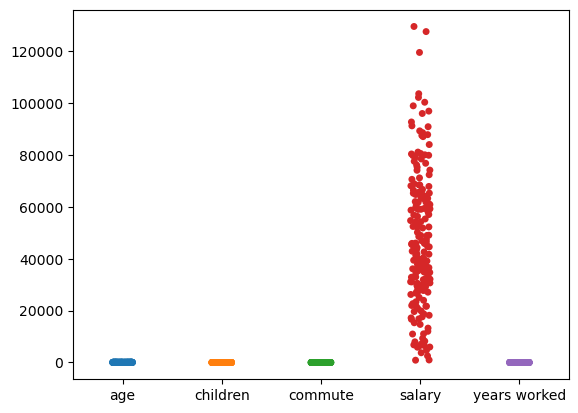

In [8]:
sns.stripplot(data = X_df)
plt.show()

Wow! Everyone has just about the same age, number of children, commute time, and years worked. Looks like the only difference between employees is in their salaries. Is that true?

In [ ]:
X_df.describe()

What is going on????

In [9]:
from sklearn.preprocessing import StandardScaler as SS

In [10]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# z = (x - u) / s 

ss = SS()
a = ss.fit(X_df)   #compute the mean and std to be used for later scaling. 
b = ss.transform(X_df) #Perform standardization by centering and scaling.

In [12]:
#a = ss.fit(X_df) 
#ss.transform(X_df)
X_scaled = ss.fit_transform(X_df) #fit to data and then transform 

In [ ]:
X_scaled[0:5] #What type of object is this???

In [15]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = X_df.columns

In [16]:
X_scaled_df.head()

,age,children,commute,salary,years worked
0,1.540846,-0.974532,-0.792575,0.250870,-0.501449
1,1.624202,-0.974532,-0.934813,0.662036,1.216092
2,-0.376355,-0.014402,-0.612905,1.883636,1.245327
3,1.124063,3.826119,-0.803804,0.438920,0.090555
4,1.540846,-0.974532,-1.014822,-1.560161,1.091845


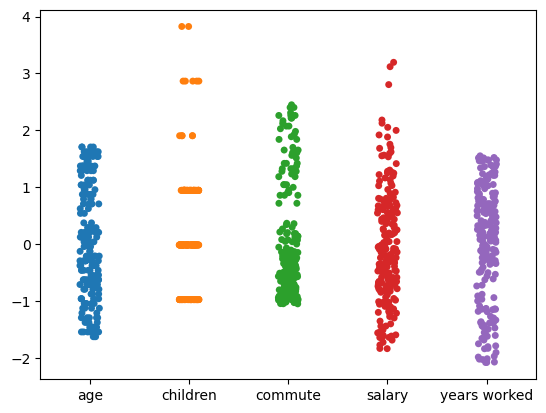

In [17]:
sns.stripplot(data = X_scaled_df)
plt.show()

What do you think now?

Let's look at a matrix of correlation coefficients for these 5 variables. We will look using both the scaled and unscaled data - see if you notice anything.

In [ ]:
#Scaled

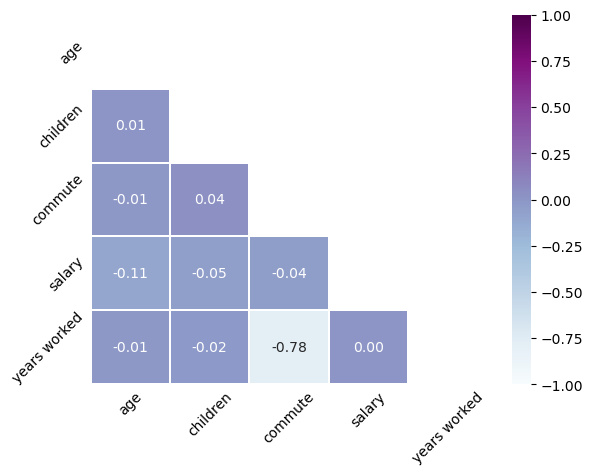

In [18]:
corr_matrix = X_scaled_df.corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='BuPu', vmin=-1, vmax=1,
            annot=True, fmt='.2f', 
           mask = mask, linewidths=.2)
plt.tick_params(size = 0, labelsize = 10)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [ ]:
#Unscaled

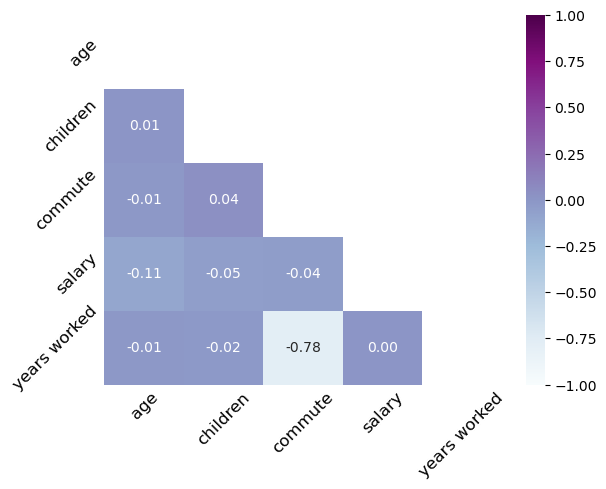

In [19]:
corr_matrix = X_df.corr()
mask = np.triu(corr_matrix)
sns.heatmap(corr_matrix, cmap='BuPu', vmin=-1, vmax=1,
            annot=True, fmt='.2f', 
           mask = mask)
plt.tick_params(size = 0, labelsize = 12)
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Let's plot the two most highly correlated variables:

In [ ]:
plt.scatter(X_df['years worked'], X_df['commute'])
plt.xlabel('Years worked', fontsize = 12)
plt.ylabel('Commute', fontsize = 12)
plt.show()

In [ ]:
X_df

That's interesting! Do those groups have anything to do with whether someone stays or goes? We need some fancier plotting code to shade in the points by their value of retain.

In [ ]:
y = work['retain']
labels = ['quit','stay']
colors = ['cornflowerblue', 'slategrey']
for yi in [0,1]:
    idx = y == yi
    plt.scatter(X_df.loc[idx,'years worked'], X_df.loc[idx,'commute'], color = colors[yi],
                label = labels[yi])
plt.xlabel('Years worked')
plt.ylabel('Commute')
plt.legend()
plt.show()

What do you notice? Do you think it matters if we plot the scaled versus the unscaled data?
  
We will use variations of this code throughout the semester, so let's take a closer look at how it works. It is critical that you understand it (and there may even be a question in the homework or an exam about code like this!).

Also: What if we want a plot like this that includes ALL of the variables, not just these two? Maybe if we could see all of the variables, all of the blue points would be in the same blob. How can we plot 5-dimensional data???